<a href="https://colab.research.google.com/github/schedutron/pagerank2/blob/master/node_embeddings_node2vec_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
import random

import gensim
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.manifold import TSNE

In [6]:
g = nx.read_gpickle("iitb_network.graph")
model = gensim.models.Word2Vec.load("iitb_network.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
nodes = [x for x in model.wv.vocab]
embeddings = np.array([model.wv[x] for x in nodes])

In [0]:
tsne = TSNE(n_components=2, random_state=7, perplexity=35)
embeddings_2d = tsne.fit_transform(embeddings)

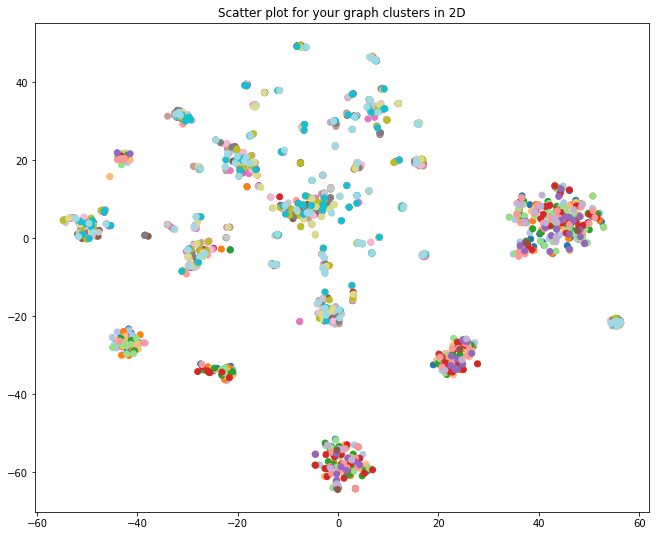

In [86]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

cmap = plt.cm.get_cmap('tab20', len(nodes))
colors = [cmap(i) for i in range(len(nodes))]

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)
ax.title.set_text(f"Scatter plot for your graph clusters in 2D")
